# Support vector machines

Based on this [post](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47).

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## The Iris data set

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
#iris.data

In [ ]:
#iris.target

## Looking at the data

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Let us plot two features and two labels:
x = df['sepal length (cm)']
y = df['petal length (cm)']

setosa_x = x[:50]
setosa_y = y[:50]

versicolor_x = x[50:100]
versicolor_y = y[50:100]

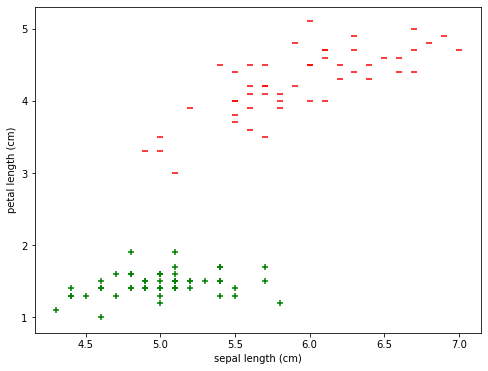

In [ ]:
# Plot it
plt.figure(figsize=(8,6))
plt.scatter(setosa_x,setosa_y,marker='+',color='green')
plt.scatter(versicolor_x,versicolor_y,marker='_',color='red')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## Simplifying the data

In [ ]:
# For simplicity we use two classes (although SVMs can also handle many):
X = iris.data[:100]
Y = iris.target[:100]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Training the model

In [ ]:
clf = SVC(kernel='linear',gamma='scale')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

## Testing the model

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Finding the hyperplane

In [ ]:
clf.coef_

array([[ 0.06995049, -0.45575934,  0.8591521 ,  0.35141728]])

In [ ]:
clf.intercept_

array([-1.48871038])

## Making predictions

In [ ]:
# A function to guess the flower
def flower(sepal_length,sepal_width,petal_length,petal_width):
    if(clf.predict([[sepal_length,sepal_width,petal_length,petal_width]]))==0:
        print('You\'re looking at a setosa!')
    else:
        print('You\'re looking at a versicolor!')

In [ ]:
#df.loc[0]
#iris.target[0]
flower(5.1,3.5,1.4,0.2)

You're looking at a setosa!


In [ ]:
#df.loc[50]
#iris.target[50]
flower(7.0,3.2,4.7,1.4)

You're looking at a versicolor!


## The breast cancer dataset

In [ ]:
bc = datasets.load_breast_cancer()

X = bc.data
Y = bc.target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Training the model

In [ ]:
#clf = SVC(kernel='linear',gamma='scale')
clf = SVC(kernel="poly",degree=2,gamma='scale')

clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testing the model

In [ ]:
y_pred = clf.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088
